# Create unit test data for comparison between matlab and Python

In [ ]:
addpath('./matlab')

In [ ]:
fprintf('MATLAB version\n')
version
clear

MATLAB version


ans = '9.11.0.1809720 (R2021b) Update 1'

In [ ]:
[stauts, data_path] = system('python -c "import mne; print(mne.datasets.testing.data_path(), end=str())"')

stauts = 0

data_path = '/Users/engemand/mne_data/MNE-testing-data'

In [ ]:
fname = strcat(data_path, '/MEG', '/sample', '/sample_audvis_trunc_raw.fif');

In [ ]:
raw = fiff_setup_read_raw(fname);

Opening raw data file /Users/engemand/mne_data/MNE-testing-data/MEG/sample/sample_audvis_trunc_raw.fif...
	Read a total of 4 projection items:
		PCA-v1 (1 x 102) idle
		PCA-v2 (1 x 102) idle
		PCA-v3 (1 x 102) idle
		Average EEG reference (1 x 60) idle
	Range : 12900 ... 18906  =     42.956 ...    62.955 secs
Ready.


In [ ]:
picks_eeg = fiff_pick_types(raw.info, 0, 1);
picks_eeg(53) = [];

In [ ]:
[data, times] = fiff_read_raw_segment(raw, raw.first_samp, raw.last_samp, picks_eeg);

Reading 12900 ... 18906  =     42.956 ...    62.955 secs... [done]


In [ ]:
data = data * 1e6;  %average ref & rescale to mV

In [ ]:
times = double(1:((raw.last_samp - raw.first_samp) + 1)) / raw.info.sfreq;

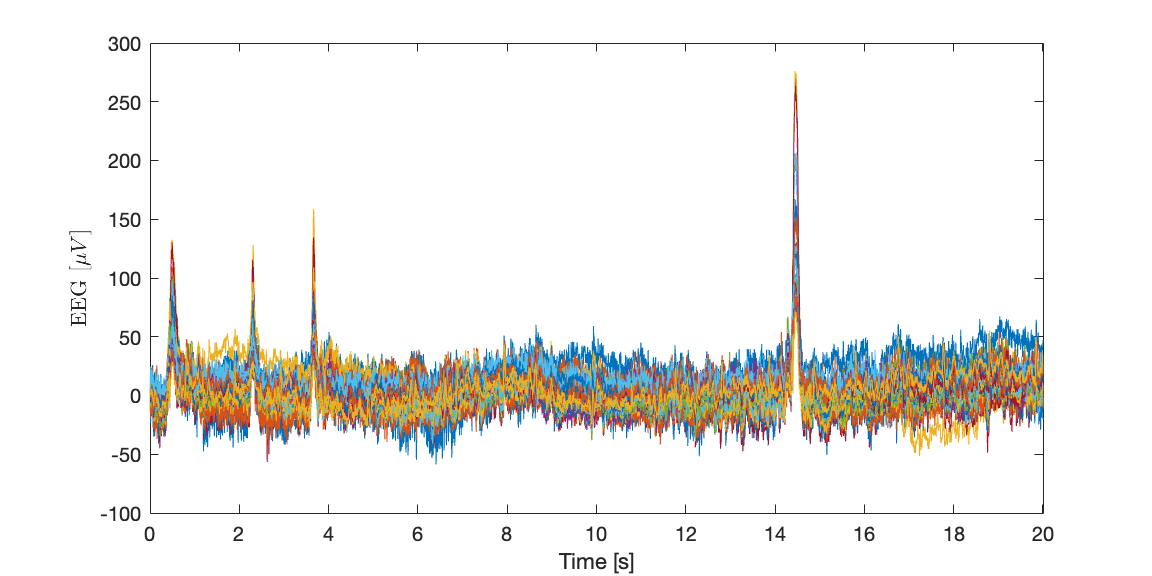

In [ ]:
plot(times, data')

set(gcf, 'Units', 'inches');
screenPosition = get(gcf, 'Position');
set(gcf, 'Position', [screenPosition(1), screenPosition(2), 8, 4]);
ylabel('EEG [${\mu V}$]', 'Interpreter','latex')
xlabel('Time [s]')
xlim([0, times(end)])

In [ ]:
raw.info.sfreq

ans = 300.3075

In [ ]:
cfg1.fsample = raw.info.sfreq;
cfg1.output = {'pow', 'csd', 'cov', 'coh', 'icoh', 'plv', 'pli', 'dwpli', 'r_plain', 'r_orth', 'gim'};
cfg1.bw_oct=0.5;
cfg1.foi_start=2;
cfg1.foi_end=32;
cfg1.window_shift=0.25;
cfg1.kernel_width=5;
cfg1.allow_fraction_nan=0;
cfg1.freq_shift_factor=1;
cfg1.density = 'oct';

cfg2 = cfg1;
cfg2.density = 'Hz';
cfg2.qt = 7;
cfg2 = rmfield(cfg2,'bw_oct');

cfg3 = cfg1;
cfg3.allow_fraction_nan = 0.1;
cfg3.n_dim = 20; 

cfg1
cfg2
cfg3

cfg1 = struct with fields:
               fsample: 300.3075
                output: {'pow'  'csd'  'cov'  'coh'  'icoh'  'plv'  'pli'  'dwpli'  'r_plain'  'r_orth'  'gim'}
                bw_oct: 0.5000
             foi_start: 2
               foi_end: 32
          window_shift: 0.2500
          kernel_width: 5
    allow_fraction_nan: 0
     freq_shift_factor: 1
               density: 'oct'

cfg2 = struct with fields:
               fsample: 300.3075
                output: {'pow'  'csd'  'cov'  'coh'  'icoh'  'plv'  'pli'  'dwpli'  'r_plain'  'r_orth'  'gim'}
             foi_start: 2
               foi_end: 32
          window_shift: 0.2500
          kernel_width: 5
    allow_fraction_nan: 0
     freq_shift_factor: 1
               density: 'Hz'
                    qt: 7

cfg3 = struct with fields:
               fsample: 300.3075
                output: {'pow'  'csd'  'cov'  'coh'  'icoh'  'plv'  'pli'  'dwpli'  'r_plain'  'r_orth'  'gim'}
                bw_oct: 0.5000
             foi_start: 2
               foi_end: 32
          window_shift: 0.2500
          kernel_width: 5
    allow_fraction_nan: 0.1000
     freq_shift_factor: 1
               density: 'oct'
                 n_dim: 20

In [ ]:
data(1:59, 5000:5050) = nan;

In [ ]:
out1 = ro_freq_meeglet(data, cfg1);

Morlet wavelet transform [.................................] 2.2 sec


In [ ]:
out2 = ro_freq_meeglet(data, cfg2);

Morlet wavelet transform [.................................] 2.0 sec


In [ ]:
out3 = ro_freq_meeglet(data, cfg3);

Morlet wavelet transform [.................................] 1.9 sec


In [ ]:
ls ./nbs/api/data/

mne_meeglet_testing_data.mat



In [ ]:
A = [-1.6747, -0.4051, 1.5477;,
     -0.7688, -0.5308, 0.6110;,
    -1.6105, 0.3157, -0.1422];
r = 3;
[U,S,V] = svd(A,0);
s = diag(S);
s = diag(ones(r,1)./s(1:r));
A_inv = V(:,1:r)*s*U(:,1:r)'

A_inv = 3x3 double
    0.1109   -0.4069   -0.5419
    1.0323   -2.5782    0.1573
    1.0363   -1.1151   -0.5452

In [ ]:
save('./nbs/api/data/mne_meeglet_testing_data.mat', 'out1', 'out2', 'out3', 'data', 'A_inv')